In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

In [4]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Senthil\\Downloads\\index.csv')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [7]:
# Basic exploratory analysis
print("Dataset Overview")
print(df.info())
print(df.describe())

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None
             money
count  1133.000000
mean     33.105808
std       5.035366
min      18.120000
25%      28.900000
50%      32.820000
75%      37.720000
max      40.000000


In [8]:
df.shape

(1133, 6)

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1128    False
1129    False
1130    False
1131    False
1132    False
Length: 1133, dtype: bool

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull()

,date,datetime,cash_type,card,money,coffee_name
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1128,False,False,False,False,False,False
1129,False,False,False,False,False,False
1130,False,False,False,False,False,False
1131,False,False,False,False,False,False


In [18]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [23]:
df.isnull().sum().sum()

89

In [25]:
df['cash_type'].value_counts()

cash_type
card    1044
cash      89
Name: count, dtype: int64

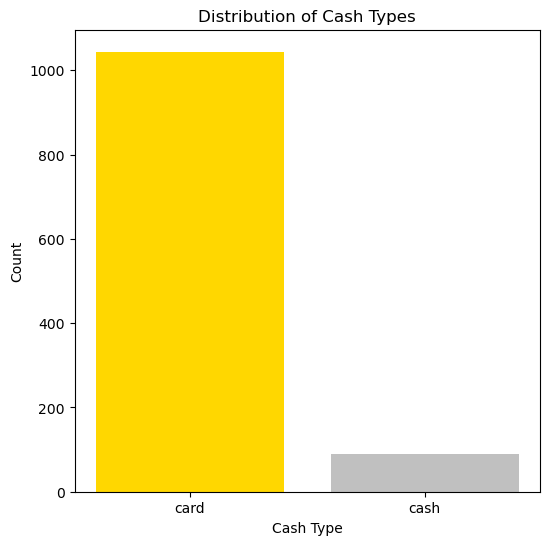

In [27]:
cash_type_counts = {'card': 1044, 'cash':89}  # From the provided data

# Data to plot
labels = list(cash_type_counts.keys())
sizes = list(cash_type_counts.values())
color = ['gold','silver']
# Plot
plt.figure(figsize=(6, 6))
plt.bar(labels, sizes, color=color)
plt.xlabel('Cash Type')
plt.ylabel('Count')
plt.title('Distribution of Cash Types')
plt.show()

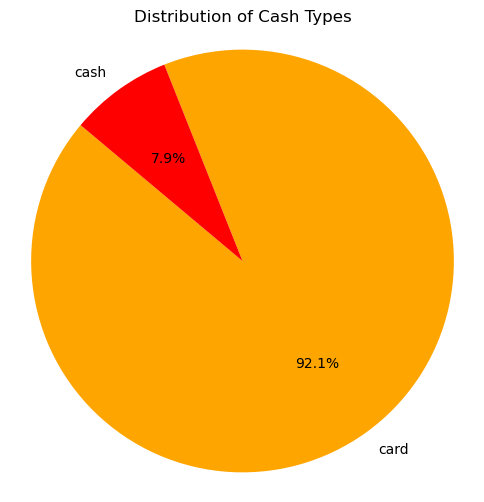

In [29]:
cash_type_counts = {'card': 1044, 'cash':89}  
labels = list(cash_type_counts.keys())
sizes = list(cash_type_counts.values())
colors = ['orange', 'red']
explode = (0,0) 
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Distribution of Cash Types')
plt.axis('equal')  

plt.show()

In [31]:
from datetime import datetime

In [33]:
#Convert 'date' to datetime and set it as the index for time series analysis
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [35]:
# Time Series Exploratory Data Analysis
def plot_sales_trend(df):
    plt.figure(figsize=(12, 6))
    df['money'].resample('D').sum().plot()
    plt.title('Daily Coffee Sales')
    plt.xlabel('time')
    plt.ylabel('money')
    plt.show()

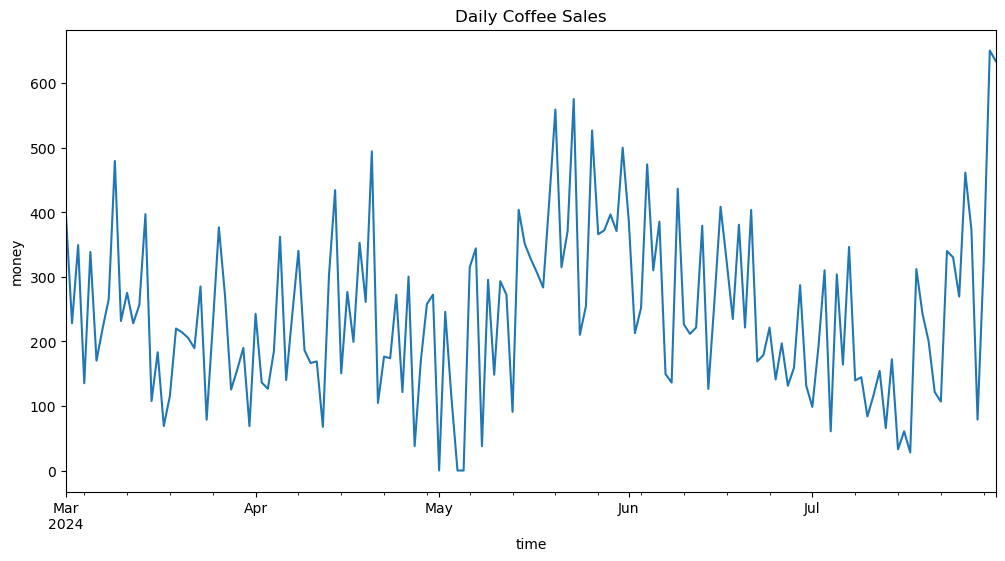

In [37]:
# Call the function to plot sales trend
plot_sales_trend(df)

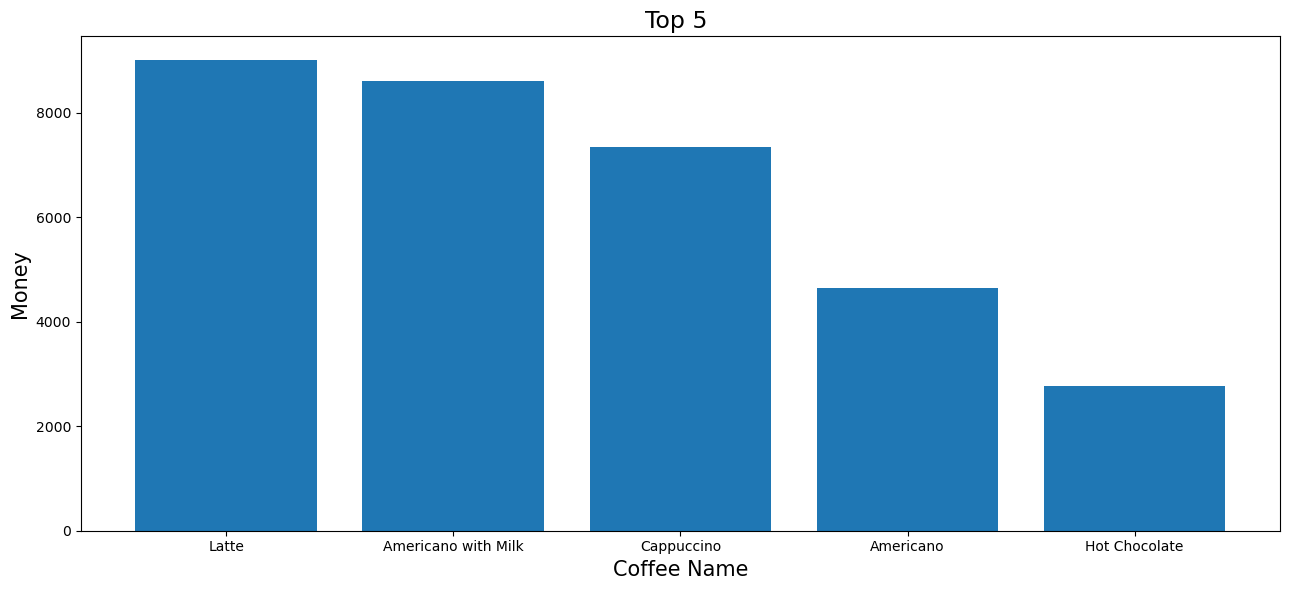

In [38]:
category_views = df.groupby('coffee_name')['money'].sum().reset_index()

#Sort the categories by views in descending order
top_categories = category_views.sort_values(by='money', ascending=False).head(5)

#Create a bar plot tovisualize the top 5 categories
plt.figure(figsize=(13, 6))
plt.bar(top_categories['coffee_name'], top_categories['money'])
plt.xlabel('Coffee Name', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.title('Top 5 ', fontsize=17)
plt.tight_layout()
plt.show()

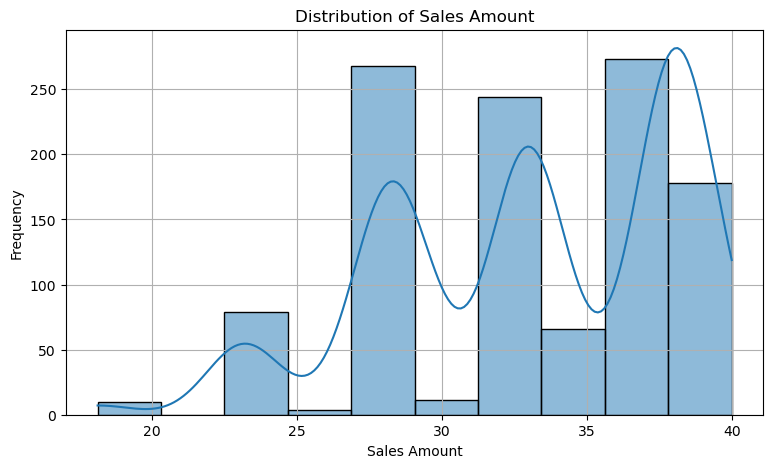

In [40]:
#Univariate Analysis
plt.figure(figsize=(9, 5))
sns.histplot(df['money'], bins=10, kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

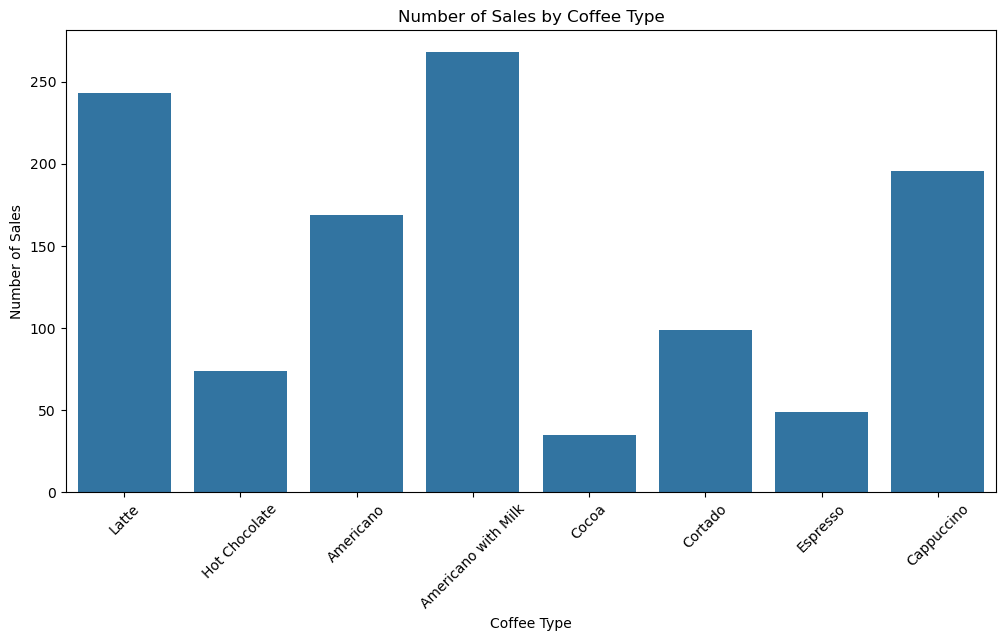

In [42]:
#Univariate Analysis
colors = ['green', 'red', 'yellow', 'orange', 'gold', 'silver', 'brown']
explode = (0,0) 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='coffee_name')
plt.title('Number of Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

In [44]:
#from datetime import datetime

In [47]:
#df['date']=pd.to_datetime(df['date'])
df['datetime']=pd.to_datetime(df['datetime'])

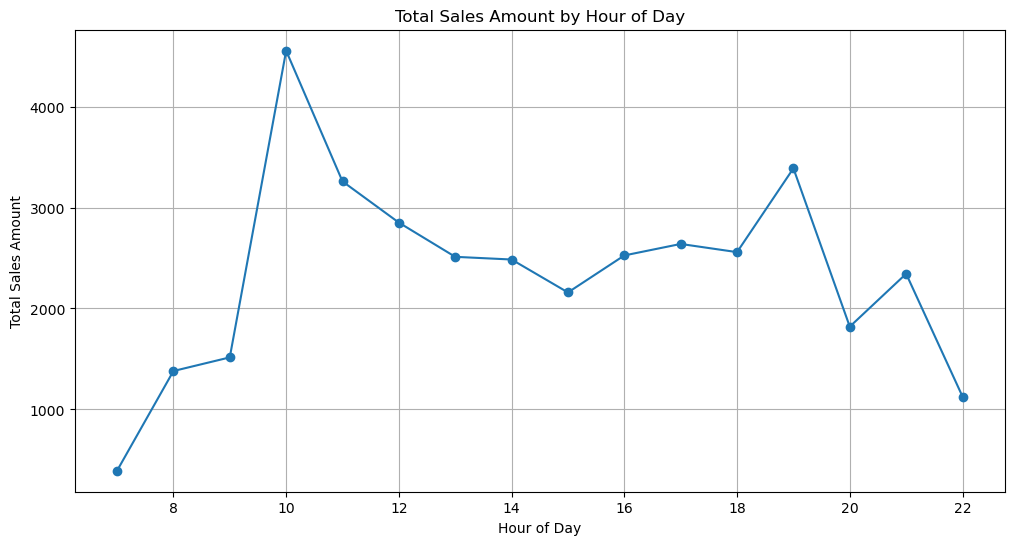

In [49]:
#Bivariate Analysis
df['hour'] = df['datetime'].dt.hour

# Aggregate sales by hour
sales_by_hour = df.groupby('hour')['money'].sum()

plt.figure(figsize=(12, 6))
sales_by_hour.plot(kind='line', marker='o')
plt.title('Total Sales Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

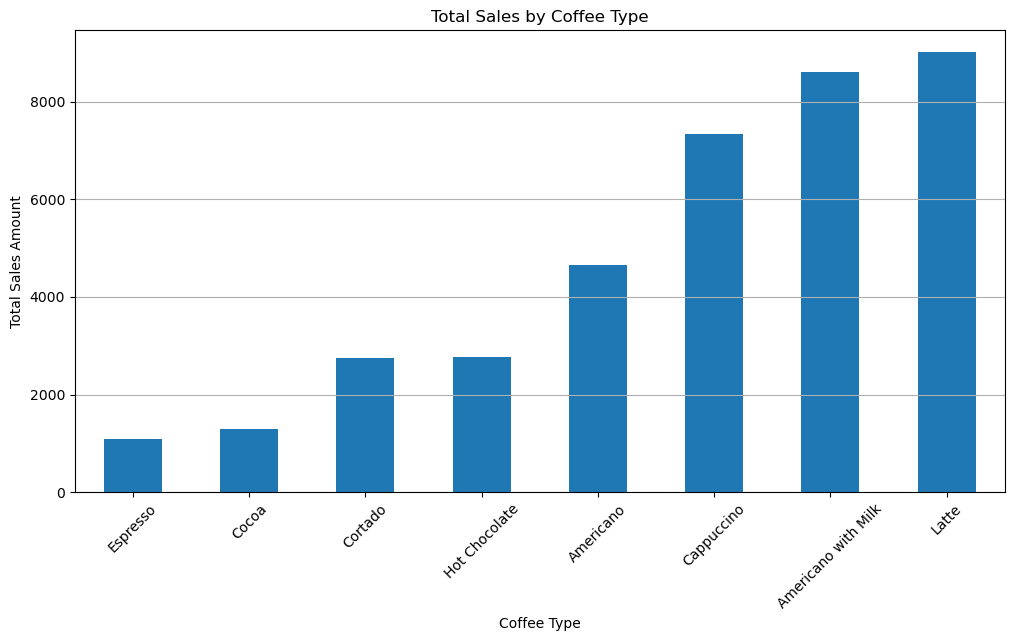

In [51]:
#Bivariate Analysis
coffee_sales = df.groupby('coffee_name')['money'].sum().sort_values()

plt.figure(figsize=(12, 6))
coffee_sales.plot(kind='bar')
plt.title('Total Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [53]:
print(df['datetime'].dtype)

datetime64[ns]


In [55]:
df['hour'] = df.index.hour
df['month'] = df.index.month
df['minute'] = df.index.minute
df['second'] = df.index.second
df['day_of_month'] = df.index.day
df['week_of_year'] = df.index.isocalendar().week
df['day_of_week'] = df.index.dayofweek

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1133 entries, 2024-03-01 to 2024-07-31
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      1133 non-null   datetime64[ns]
 1   cash_type     1133 non-null   object        
 2   card          1044 non-null   object        
 3   money         1133 non-null   float64       
 4   coffee_name   1133 non-null   object        
 5   hour          1133 non-null   int32         
 6   month         1133 non-null   int32         
 7   minute        1133 non-null   int32         
 8   second        1133 non-null   int32         
 9   day_of_month  1133 non-null   int32         
 10  week_of_year  1133 non-null   UInt32        
 11  day_of_week   1133 non-null   int32         
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(6), object(3)
memory usage: 85.2+ KB


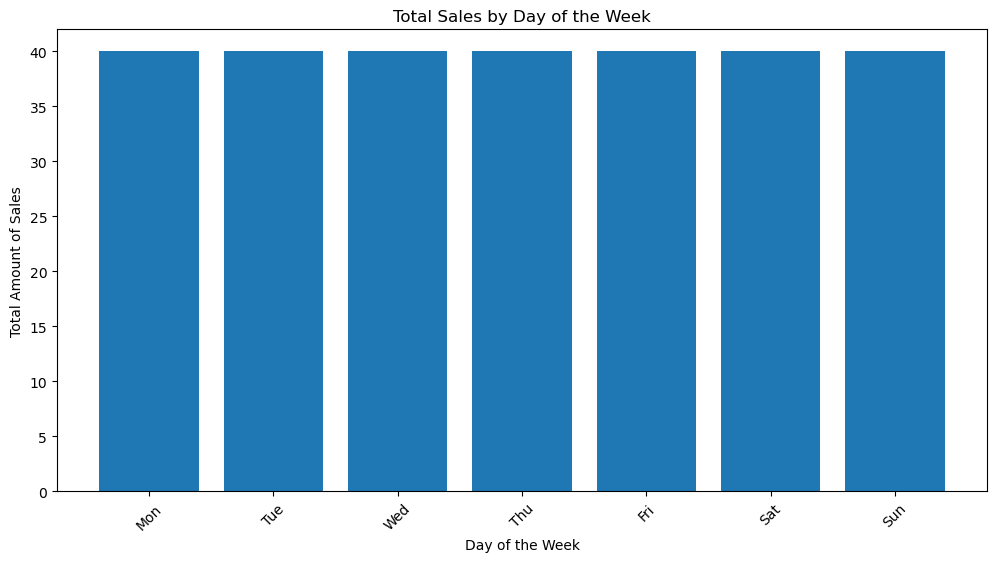

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(df['day_of_week'],df['money'])
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Amount of Sales')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

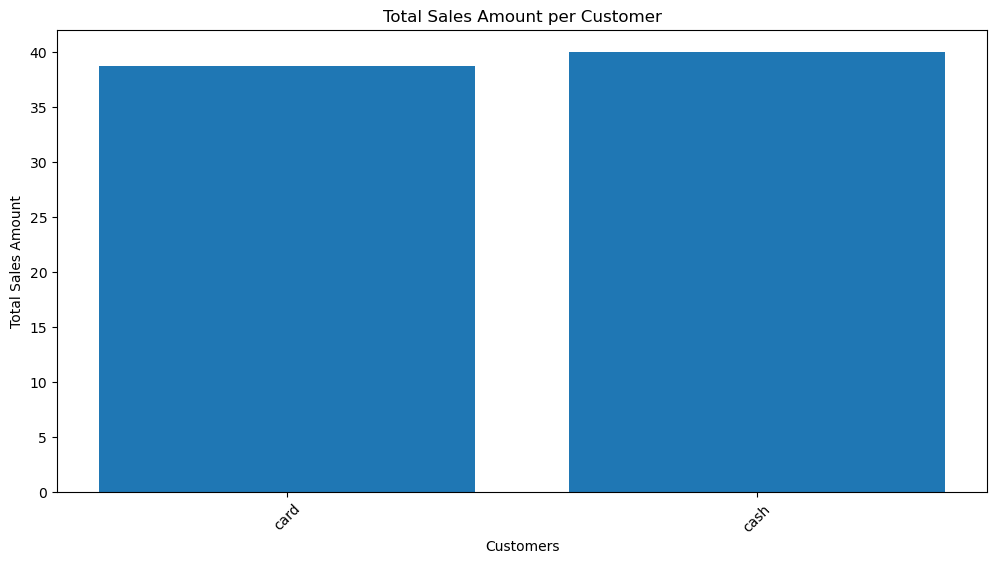

In [60]:
#Customer Analysis
plt.figure(figsize=(12, 6))
plt.bar(df['cash_type'], df['money'])
plt.title('Total Sales Amount per Customer')
plt.xlabel('Customers')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

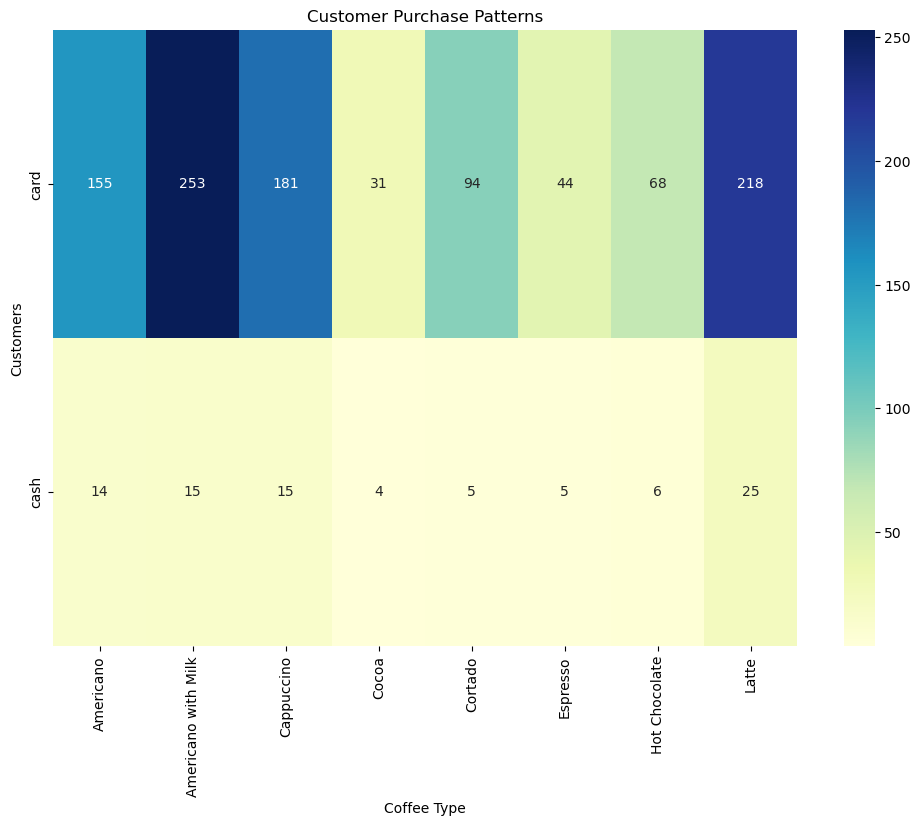

In [61]:
customer_summary = df.groupby(['cash_type', 'coffee_name']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(customer_summary, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Purchase Patterns')
plt.xlabel('Coffee Type')
plt.ylabel('Customers')
plt.show()

In [368]:
#Calculating daily sales
daily_sales = df['money'].resample('D').sum()
df['daily_sales'] = df['money'].resample('D').transform('sum')
df

,datetime,cash_type,card,money,coffee_name,hour,month,minute,second,day_of_month,week_of_year,day_of_week,daily_sales
date,,,,,,,,,,,,,
2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,0,3,0,0,1,9,4,396.30
2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,0,3,0,0,1,9,4,396.30
2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,0,3,0,0,1,9,4,396.30
2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,0,3,0,0,1,9,4,396.30
2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,0,3,0,0,1,9,4,396.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,0,7,0,0,31,31,2,633.84
2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,0,7,0,0,31,31,2,633.84
2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,0,7,0,0,31,31,2,633.84


In [370]:
#Calculating Cumulative Sales
df['cumulative_sales'] = df['money'].cumsum()
df

,datetime,cash_type,card,money,coffee_name,hour,month,minute,second,day_of_month,week_of_year,day_of_week,daily_sales,cumulative_sales
date,,,,,,,,,,,,,,
2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,0,3,0,0,1,9,4,396.30,38.70
2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,0,3,0,0,1,9,4,396.30,77.40
2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,0,3,0,0,1,9,4,396.30,116.10
2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,0,3,0,0,1,9,4,396.30,145.00
2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,0,3,0,0,1,9,4,396.30,183.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,0,7,0,0,31,31,2,633.84,37382.50
2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,0,7,0,0,31,31,2,633.84,37410.42
2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,0,7,0,0,31,31,2,633.84,37443.24


In [372]:
# indicating whether a purchase was made on a weekend or weekday
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df

,datetime,cash_type,card,money,coffee_name,hour,month,minute,second,day_of_month,week_of_year,day_of_week,daily_sales,cumulative_sales,is_weekend
date,,,,,,,,,,,,,,,
2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,0,3,0,0,1,9,4,396.30,38.70,0
2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,0,3,0,0,1,9,4,396.30,77.40,0
2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,0,3,0,0,1,9,4,396.30,116.10,0
2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,0,3,0,0,1,9,4,396.30,145.00,0
2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,0,3,0,0,1,9,4,396.30,183.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,0,7,0,0,31,31,2,633.84,37382.50,0
2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,0,7,0,0,31,31,2,633.84,37410.42,0
2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,0,7,0,0,31,31,2,633.84,37443.24,0


In [374]:
#Calculating average Sales per Transaction
df['avg_sales_per_transaction'] = df['money'].mean()
df

,datetime,cash_type,card,money,coffee_name,hour,month,minute,second,day_of_month,week_of_year,day_of_week,daily_sales,cumulative_sales,is_weekend,avg_sales_per_transaction
date,,,,,,,,,,,,,,,,
2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,0,3,0,0,1,9,4,396.30,38.70,0,33.105808
2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,0,3,0,0,1,9,4,396.30,77.40,0,33.105808
2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,0,3,0,0,1,9,4,396.30,116.10,0,33.105808
2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,0,3,0,0,1,9,4,396.30,145.00,0,33.105808
2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,0,3,0,0,1,9,4,396.30,183.70,0,33.105808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,0,7,0,0,31,31,2,633.84,37382.50,0,33.105808
2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,0,7,0,0,31,31,2,633.84,37410.42,0,33.105808
2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,0,7,0,0,31,31,2,633.84,37443.24,0,33.105808
